In [24]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import pandas as pd
import random

In [25]:
data=pd.read_csv('./data.csv')
data['OPP']=data.MATCHUP.apply(lambda x: x[-3:])
cleanedData=data[['TEAM_ABBREVIATION', 'OPP', 'PTS']]
table=cleanedData.groupby(['TEAM_ABBREVIATION', 'OPP']).sum().pivot_table(values='PTS', index='OPP', columns='TEAM_ABBREVIATION')
table.fillna(0, inplace=True)
matrix=table-table.T

In [26]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [36]:
matrix

TEAM_ABBREVIATION,ATL,BKN,BOS,CHA,CHI,CLE,DAL,DEN,DET,GSW,HOU,IND,LAC,LAL,MEM,MIA,MIL,MIN,NJN,NOH,NOP,NYK,OKC,ORL,PHI,PHX,POR,SAC,SAS,TOR,UTA,WAS
OPP,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ATL,0.0,38.0,108.0,-134.0,150.0,-77.0,-34.0,119.0,-58.0,62.0,62.0,67.0,52.0,123.0,-32.0,209.0,17.0,-32.0,-70.0,28.0,-42.0,104.0,32.0,-182.0,-42.0,-99.0,28.0,-104.0,144.0,144.0,6.0,-77.0
BKN,-38.0,0.0,268.0,-97.0,107.0,78.0,23.0,56.0,-86.0,43.0,44.0,163.0,68.0,30.0,92.0,47.0,251.0,79.0,0.0,-14.0,25.0,135.0,54.0,-144.0,-54.0,-80.0,99.0,-39.0,99.0,185.0,100.0,-34.0
BOS,-108.0,-268.0,0.0,-401.0,-89.0,-171.0,-45.0,-21.0,-169.0,-92.0,-44.0,-164.0,109.0,-109.0,-193.0,-150.0,-141.0,-153.0,-80.0,30.0,-119.0,-209.0,49.0,-379.0,-213.0,-92.0,-140.0,-211.0,19.0,-120.0,-91.0,-228.0
CHA,134.0,97.0,401.0,0.0,179.0,127.0,121.0,114.0,-40.0,160.0,142.0,220.0,313.0,104.0,35.0,347.0,207.0,-60.0,29.0,40.0,67.0,72.0,160.0,-80.0,228.0,108.0,161.0,20.0,176.0,149.0,208.0,66.0
CHI,-150.0,-107.0,89.0,-179.0,0.0,-190.0,6.0,137.0,-216.0,242.0,99.0,61.0,161.0,-33.0,-54.0,129.0,116.0,2.0,-47.0,-46.0,-21.0,24.0,154.0,-163.0,-20.0,57.0,53.0,45.0,42.0,17.0,18.0,-129.0
CLE,77.0,-78.0,171.0,-127.0,190.0,0.0,78.0,107.0,-98.0,273.0,63.0,146.0,104.0,92.0,-80.0,325.0,43.0,30.0,-1.0,42.0,111.0,-42.0,70.0,-135.0,33.0,-7.0,144.0,57.0,148.0,96.0,74.0,-139.0
DAL,34.0,-23.0,45.0,-121.0,-6.0,-78.0,0.0,10.0,-117.0,39.0,-2.0,86.0,69.0,-53.0,-39.0,61.0,-72.0,-38.0,-13.0,-75.0,-145.0,-58.0,24.0,-197.0,-127.0,27.0,-202.0,-99.0,163.0,56.0,-156.0,-162.0
DEN,-119.0,-56.0,21.0,-114.0,-137.0,-107.0,-10.0,0.0,-129.0,49.0,5.0,-57.0,-64.0,-241.0,-91.0,-129.0,-139.0,-99.0,4.0,-11.0,-74.0,-161.0,73.0,-181.0,40.0,-218.0,-82.0,-219.0,188.0,-61.0,32.0,-78.0
DET,58.0,86.0,169.0,40.0,216.0,98.0,117.0,129.0,0.0,129.0,71.0,246.0,218.0,144.0,253.0,187.0,351.0,61.0,-20.0,38.0,131.0,236.0,87.0,27.0,249.0,-22.0,112.0,-52.0,235.0,106.0,192.0,113.0


# Using networkx

In [69]:
team=input('Which NBA team do you want to learn about?')

G=nx.Graph()
for i in matrix.index:
    if i != team:
        G.add_edge(team, i, weight=matrix.loc[i,team])

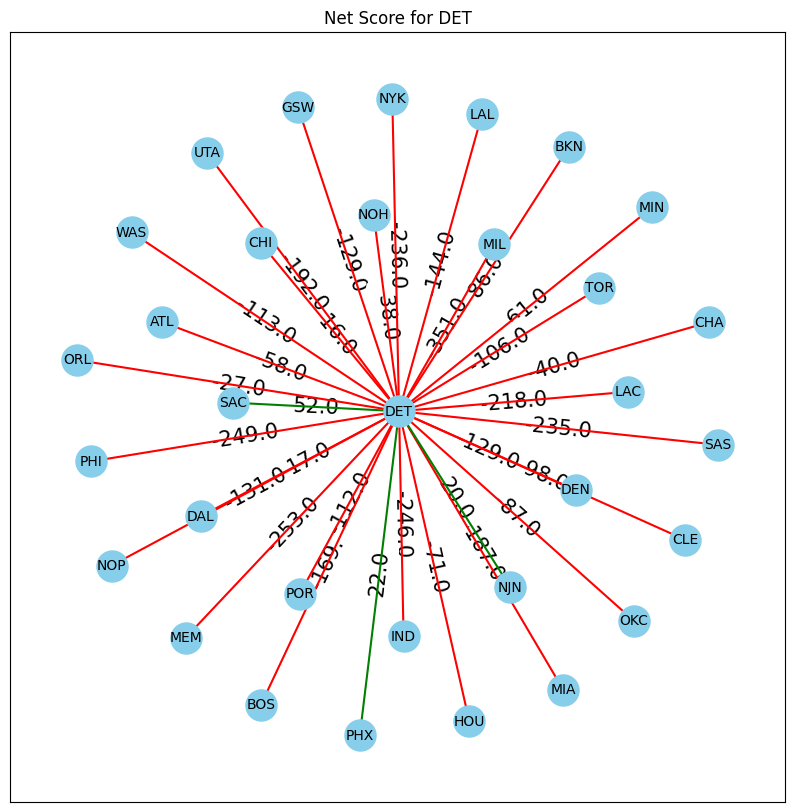

In [70]:
plt.figure(figsize=(10, 10))

pos = nx.spring_layout(G, weight='inv_weight')

# pos=nx.bfs_layout(G_sub, 'LAC')

# top = nx.bipartite.sets(G)[0]
# pos = nx.bipartite_layout(G, top)

# pos=nx.circular_layout(G)

# pos=nx.spiral_layout(G)

# nx.draw_networkx(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_color='black')

nx.draw_networkx_nodes(G, pos, node_size=500, node_color="skyblue")
nx.draw_networkx_labels(G,pos, font_size=10, font_color="black")
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'), font_size=15)
nx.draw_networkx_edges(G, pos, edge_color=['red' if weight<0 else 'green' for _, _, weight in G.edges(data='weight')], width=1.5)
plt.title(f"Net Score for {team}")
plt.show()

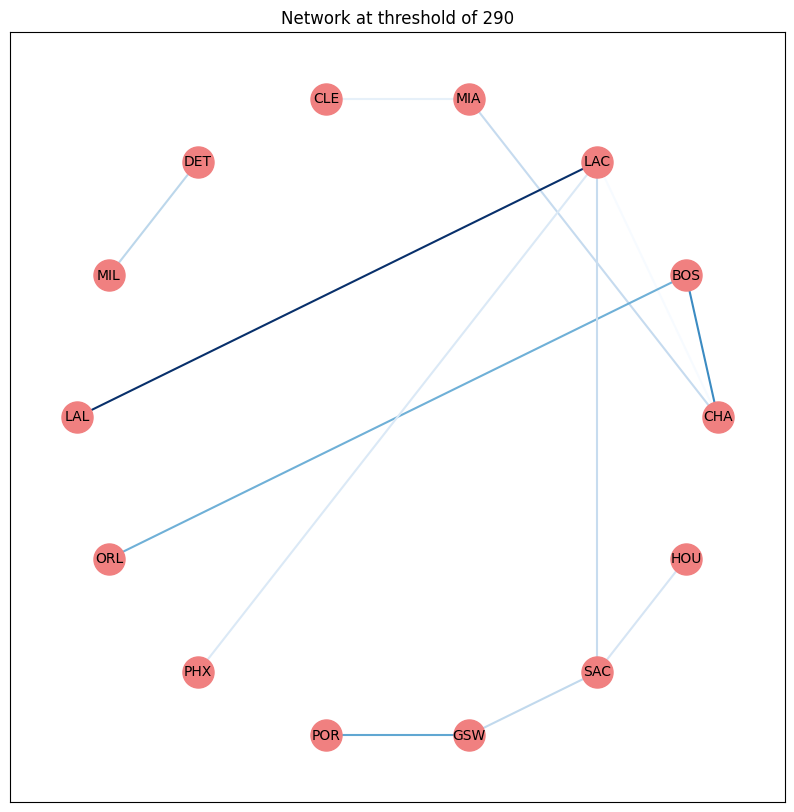

In [71]:
threshold = int(input('Please enter a threshold value of net score.'))

pos_edges = [
    (i, j, matrix.loc[i, j])
    for i in matrix.index
    for j in matrix.columns
    if i != j and matrix.loc[i, j] > threshold
]


G_pos = nx.Graph() #positive graph
G_pos.add_weighted_edges_from(pos_edges)


pos_layout = nx.circular_layout(G_pos) ## circular layout to space out nodes

pos_cmap = cm.Blues # color by correlation direction

def get_edge_colors(graph, cmap):
    weights = [abs(weight) for _, _, weight in graph.edges(data="weight")]
    norm = mcolors.Normalize(vmin=min(weights), vmax=max(weights))
    return [cmap(norm(weight)) for weight in weights]


# Plot negative correlations
plt.figure(figsize=(10, 10))
nx.draw_networkx_nodes(G_pos, pos_layout, node_size=500, node_color="lightcoral")
nx.draw_networkx_labels(G_pos, pos_layout, font_size=10, font_color="black")
nx.draw_networkx_edges(G_pos, pos_layout, edge_color=get_edge_colors(G_pos, pos_cmap), width=1.5)
plt.title(f"Network at threshold of {threshold}")
plt.show()


# Manually defied class

In [ ]:
class DirectedWeightedGraph:
    '''A directed weighted graph representation using adjacency list.'''

    def __init__(self):
        '''
        Initialize the graph instance.

        Attributes
        ----------
        graph: dict
            A dictionary to store the adjacency list of the graph.
            Keys are vertex labels, and values are lists of (neighbor, weight) tuples.
        '''
        self.graph = {}

    def add_edge(self, from_node, to_node, weight):
        '''
        Add an edge to the graph.

        Parameters
        ----------
        from_node: any hashable type
            The label of the vertex to start from.

        to_node: any hashable type
            The label of the vertex to go to.

        Returns
        -------
        None
        '''
        if from_node not in self.graph:
            self.graph[from_node] = {}
        self.graph[from_node][to_node] = weight

    def display(self):
        '''
        Display the graph. Print the graph in a meaningful way.

        Parameters
        ----------
        None

        Returns
        -------
        None
        '''
        for from_node in self.graph:
            for to_node in self.graph[from_node]:
                weight = self.graph[from_node][to_node]
                print(f"{from_node} -> {to_node} [weight={weight}]")

    def get_a_chain(self, source, target):
        '''
        Get a radom chain from source to target where net scores between teams
        are changing monotonically.

        Parameters
        ----------
        source: node 
            The team for the chain to start with.

        target: node
            The team for the chain to end with.

        Returns
        -------
        None
        '''
        if self.graph[source][target]>0:
            direction = lambda val: val > 0
        else:
            direction = lambda val: val < 0
        
        found=False
        while not found:
            teams=[source]
            weights=[]
            current=source
            dead=False
            while not dead:
                data=list(self.graph[current].items())
                random.shuffle(data)
                for i, (key, val) in enumerate(data):
                    if direction(val) and key not in teams:
                        current=key
                        teams.append(current)
                        weights.append(val)
                        break
                    is_last = i == len(data) - 1
                    if is_last:
                        dead=True
                        break
                if current == target:
                    found=True
                    break

        result = source
        for i in range(len(weights)):
            weight = weights[i]
            team = teams[i+1]
            result += f" -> ({weight}) {team}"
        print(result)

    def get_a_loop(self, source, is_increasing=True):
        '''
        Get a radom loop containing source where net scores between teams
        are changing monotonically depending on is_increasing.

        Parameters
        ----------
        source: node
            The team for the loop to start with.

        is_increasing: bool
            The direction for net scores between teams to change. True by default.
            
        Returns
        -------
        None
        '''
        if is_increasing:
            direction = lambda val: val > 0
        else:
            direction = lambda val: val < 0
        
        found=False
        while not found:
            teams=[]
            weights=[]
            current=source
            dead=False
            while not dead:
                data=list(self.graph[current].items())
                random.shuffle(data)
                for i, (key, val) in enumerate(data):
                    is_last = i == len(data) - 1
                    if direction(val) and key not in teams:
                        current=key
                        teams.append(current)
                        weights.append(val)
                        break
                    if is_last:
                        dead=True
                        break
                if current == source:
                    found=True
                    break

        result = source
        for i in range(len(weights)):
            weight = weights[i]
            team = teams[i]
            result += f" -> ({weight}) {team}"
        print(result)



In [31]:
G_total=DirectedWeightedGraph()
for i in matrix.index:
    for j in matrix.columns:
        if i!=j:
            G_total.add_edge(i, j, weight=matrix.loc[j,i])

In [72]:
source=input('Please enter a source.')
target=input('Please enter a target.')

In [73]:
G_total.get_a_chain(source, target)

LAC -> (332.0) PHX -> (27.0) DAL -> (99.0) SAC -> (105.0) ORL -> (27.0) DET -> (20.0) NJN -> (29.0) CHA -> (60.0) MIN -> (30.0) CLE -> (78.0) BKN -> (34.0) WAS -> (23.0) LAL -> (123.0) ATL -> (42.0) PHI -> (40.0) DEN -> (11.0) NOH -> (30.0) BOS


In [74]:
team=input('Please enter a team.')

In [75]:
G_total.get_a_loop(team)

CHI -> (216.0) DET -> (22.0) PHX -> (18.0) NOH -> (10.0) SAC -> (7.0) WAS -> (23.0) LAL -> (123.0) ATL -> (32.0) MIN -> (2.0) CHI
